# Recurrent Neural Networks(RNN)

In Deep Neural Networks, at each layer input is multiplied by a weight, a biased value is added and the result is passed through a activation function which gives an output which goes as an input to the next layer.

Coming to RNN's, current input is feeded and the hidden state is calculated followed by generating the output, at the next step the previous hidden state to calculate current hidden state with the current input.


In [1]:
#import necessary libraries
import matplotlib.pyplot as plt
import tensorflow as tf
import keras


Using TensorFlow backend.


In [2]:
#Mnist dataset
mnist_data = keras.datasets.mnist

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers.recurrent import LSTM, SimpleRNN

In [43]:
#Load the data from dataset
(xtrain, ytrain), (xtest, ytest) = mnist_data.load_data()

In [44]:
#Normalizing values
#xtrain = keras.utils.normalize(xtrain, axis=1)
#xtest = keras.utils.normalize(xtest, axis=1)
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')
xtrain /= 255
xtest /= 255

In [45]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [46]:
xtrain[0].shape

(28, 28)

In [47]:
rnn_model = Sequential()

In [48]:
#rnn_model.add(Flatten())
rnn_model.add(SimpleRNN(128,input_shape=xtrain[0].shape))
#rnn_model.add(SimpleRNN(128,input_shape=xtrain[0].shape,return_sequences=True))
#rnn_model.add(SimpleRNN(128))
rnn_model.add(Dense(units=10))
rnn_model.add(Activation('softmax'))

In [49]:
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [50]:
from keras.utils import np_utils
#ytrain to be converted to categorical one hot vectors
ytrain = np_utils.to_categorical(ytrain, 10)
ytest = np_utils.to_categorical(ytest, 10)

In [57]:
#h = rnn_model.fit(xtrain,ytrain,epochs=5)
h = rnn_model.fit(xtrain,ytrain,epochs=10,batch_size=128,verbose=2)

Epoch 1/10
 - 8s - loss: 0.0719 - acc: 0.9795
Epoch 2/10
 - 9s - loss: 0.0714 - acc: 0.9794
Epoch 3/10
 - 9s - loss: 0.0718 - acc: 0.9792
Epoch 4/10
 - 9s - loss: 0.0698 - acc: 0.9792
Epoch 5/10
 - 8s - loss: 0.0708 - acc: 0.9792
Epoch 6/10
 - 8s - loss: 0.0619 - acc: 0.9819
Epoch 7/10
 - 7s - loss: 0.0648 - acc: 0.9808
Epoch 8/10
 - 7s - loss: 0.0639 - acc: 0.9815
Epoch 9/10
 - 8s - loss: 0.0566 - acc: 0.9839
Epoch 10/10
 - 8s - loss: 0.0632 - acc: 0.9818


In [58]:
rnn_model.evaluate(xtest,ytest,verbose=2)

[0.08387483101002872, 0.9781]

In [59]:
val_loss, val_accuracy = rnn_model.evaluate(xtest,ytest)
print(val_loss)
print(val_accuracy)

10000/10000 [==============================] - 1s 99us/step
0.08387483101002872
0.9781


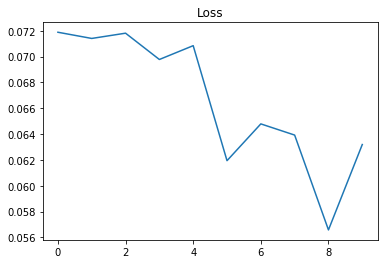

In [60]:
plt.plot(h.epoch,h.history['loss'])
plt.title("Loss")
plt.show()

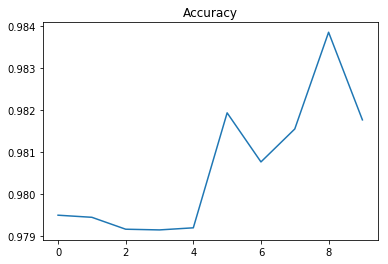

In [62]:
plt.plot(h.epoch,h.history['acc'])
plt.title("Accuracy")
plt.show()